In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.anova import anova_lm


plt.style.use('seaborn')
%matplotlib inline

# 1. Simple Linear Regression

In [2]:
boston = sm.datasets.get_rdataset('Boston', 'MASS').data

In [3]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
result = smf.ols('medv ~ lstat', data=boston).fit()

In [5]:
result.params

Intercept    34.553841
lstat        -0.950049
dtype: float64

In [6]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           5.08e-88
Time:                        21:13:33   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
result.conf_int()

,0,1
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


In [8]:
result.predict(pd.DataFrame({'lstat': [5, 10, 15]}))

0    29.803594
1    25.053347
2    20.303101
dtype: float64

In [9]:
a = result.get_prediction(pd.DataFrame({'lstat': [5, 10, 15]}))

In [10]:
a.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


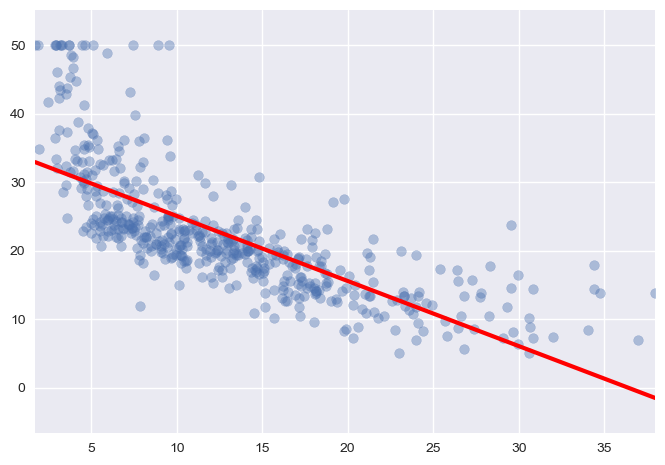

In [11]:
fig = smg.abline_plot(model_results=result, color='r', linewidth=3)
ax = fig.axes[0]
ax.scatter('lstat', 'medv', data = boston, alpha=0.4)
ax.margins(.1)
plt.show()

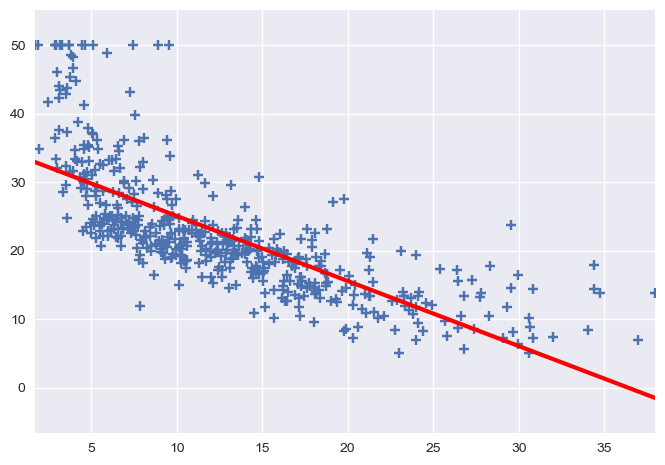

In [12]:
fig = smg.abline_plot(model_results=result, color='r', linewidth=3)
ax = fig.axes[0]
ax.scatter('lstat', 'medv', marker='+', data = boston)
ax.margins(.1)
plt.show()

__Diagnostic Plots__

Text(0.5, 0.98, 'Diagnostic Plots')

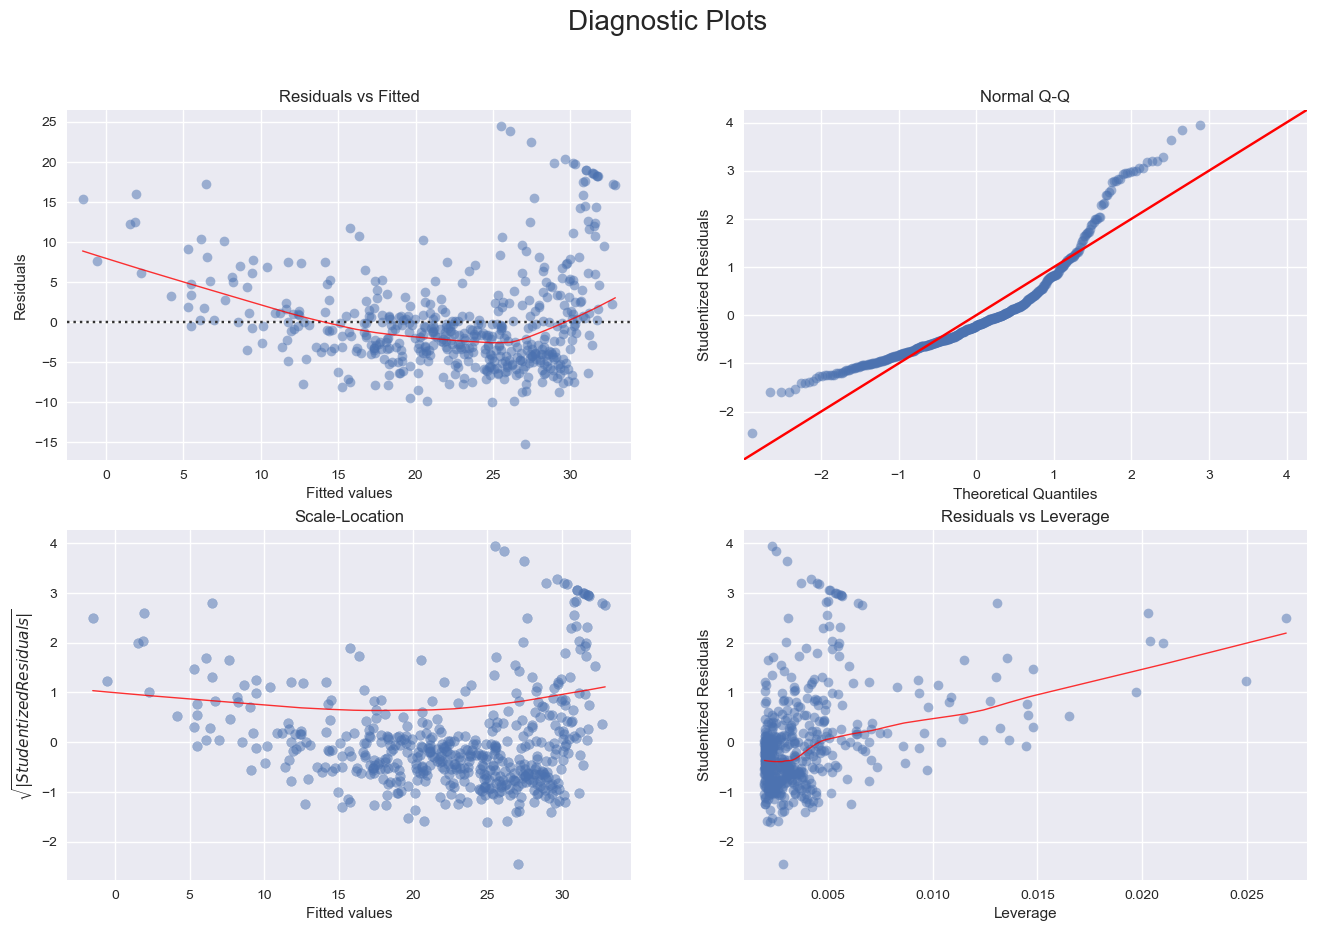

In [13]:
fig, ax = plt.subplots(2, 2, figsize = (16, 10))

fitted_values = result.fittedvalues
residuals = result.resid
studentized_residuals = result.get_influence().resid_studentized_internal
leverage = result.get_influence().hat_matrix_diag

# Residual vs fitted values
sns.residplot(x=fitted_values, y=boston['medv'], lowess = True,
              ax=ax[0, 0], scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax[0, 0].set(xlabel='Fitted values', ylabel='Residuals', 
             title='Residuals vs Fitted')
ax[0, 0].set_xlim(fitted_values.min() - 1, fitted_values.max() + 1)

# Normal Q-Q Plot
smg.qqplot(studentized_residuals, ax=ax[0, 1], alpha=0.5, line='45', lw=1)
ax[0, 1].set(ylabel='Studentized Residuals', title='Normal Q-Q')

# Scale-Location
ax[1, 0].scatter(fitted_values, studentized_residuals, alpha=0.5)
sns.regplot(x=fitted_values, y=np.sqrt(np.abs(studentized_residuals)), 
            ax=ax[1, 0], scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax[1, 0].set(title='Scale-Location', xlabel='Fitted values',
               ylabel='$\sqrt{|Studentized Residuals|}$')

# Residuals vs Leverage
sns.regplot(ax=ax[1, 1], x=leverage, y=studentized_residuals,
            scatter_kws={'alpha': 0.5}, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax[1, 1].set_xlim(leverage.min() - 0.001, leverage.max() + 0.001)
ax[1, 1].set(ylabel='Studentized Residuals', title='Residuals vs Leverage',
             xlabel='Leverage')

plt.suptitle('Diagnostic Plots', size=20)

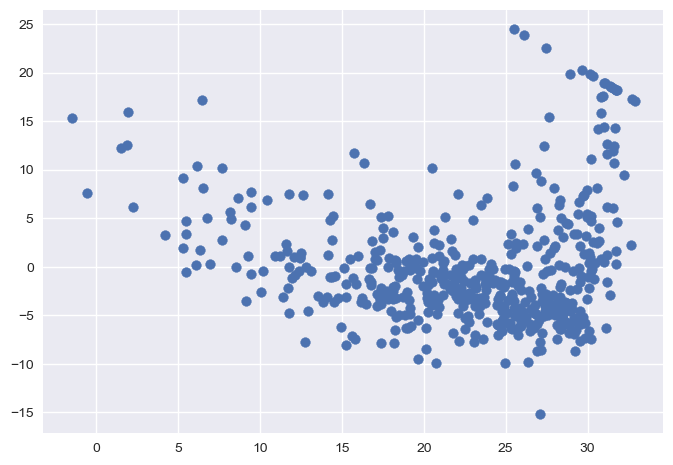

In [14]:
plt.scatter(fitted_values, residuals)

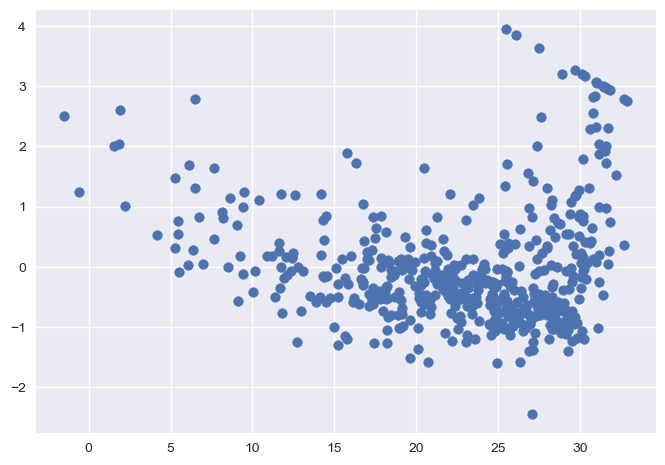

In [15]:
plt.scatter(fitted_values, studentized_residuals)

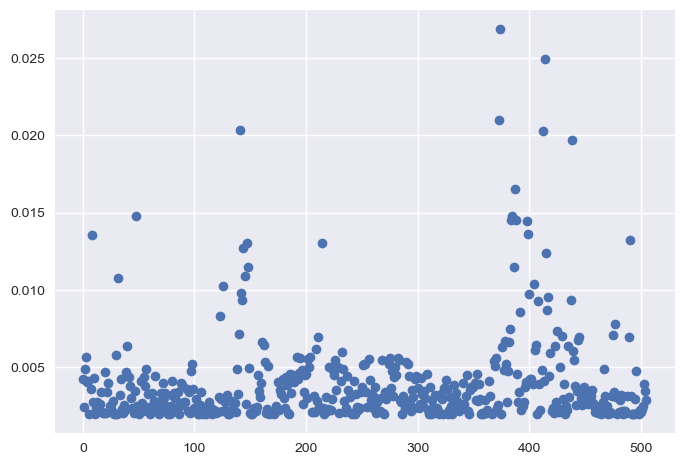

In [16]:
plt.plot(leverage, 'o')

In [17]:
np.argmax(leverage)

374

# 2. Multiple Linear Regression

In [18]:
result = smf.ols('medv ~ lstat + age', data=boston).fit()

In [19]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           2.98e-88
Time:                        21:13:37   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
cols = list(boston.columns[:-1])
cols.remove('black')
result = smf.ols('medv ~ ' + '+'.join(cols), data=boston).fit()

In [21]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sat, 01 Oct 2022   Prob (F-statistic):          2.23e-133
Time:                        21:13:37   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.000      31.919      51.316
crim          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
zn             0.0470      0.014      3.384      0.001       0.020       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.136
chas           2.8400      0.870      3.264      0.001       1.131       4.549
nox          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
rm             3.6581      0.420      8.705      0.000       2.832       4.484
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
rad            0.2894      0.067      4.325      0.000       0.158       0.421
tax           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
ptratio       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
lstat         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
X = boston[cols]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [23]:
vif_data

,feature,VIF
0,crim,2.077944
1,zn,2.842980
2,indus,14.446693
3,chas,1.148528
4,nox,73.077558
5,rm,76.160431
6,age,21.350797
7,dis,14.576652
8,rad,14.732498
9,tax,61.225416


In [24]:
result = smf.ols('medv ~ ' + '+'.join(cols) + '- age', data=boston).fit()

In [25]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     124.1
Date:                Sat, 01 Oct 2022   Prob (F-statistic):          2.03e-134
Time:                        21:13:37   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     494   BIC:                             3085.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5251      4.920      8.441      0.000      31.859      51.191
crim          -0.1214      0.033     -3.683      0.000      -0.186      -0.057
zn             0.0465      0.014      3.379      0.001       0.019       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.135
chas           2.8528      0.868      3.287      0.001       1.148       4.558
nox          -18.4851      3.714     -4.978      0.000     -25.782     -11.188
rm             3.6811      0.411      8.951      0.000       2.873       4.489
dis           -1.5068      0.193     -7.825      0.000      -1.885      -1.128
rad            0.2879      0.067      4.322      0.000       0.157       0.419
tax           -0.0127      0.004     -3.333      0.001      -0.020      -0.005
ptratio       -0.9346      0.132     -7.099      0.000      -1.193      -0.676
lstat         -0.5474      0.048    -11.483      0.000      -0.641      -0.454
==============================================================================
Omnibus:                      172.506   Durbin-Watson:                   1.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.941
Skew:                           1.485   Prob(JB):                    3.81e-158
Kurtosis:                       8.056   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3. Interaction Terms

In [26]:
result = smf.ols('medv ~ lstat * age', data=boston).fit()

In [27]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           4.86e-88
Time:                        21:13:38   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 4. Non-linear Transformations of the Predictors

In [28]:
result2 = smf.ols('medv ~ lstat + I(lstat ** 2)', data=boston).fit()

In [29]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sat, 01 Oct 2022   Prob (F-statistic):          1.56e-112
Time:                        21:13:38   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
lstat            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
I(lstat ** 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
result = smf.ols('medv ~ lstat', data=boston).fit()

In [31]:
anova_lm(result, result2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


Text(0.5, 0.98, 'Diagnostic Plots')

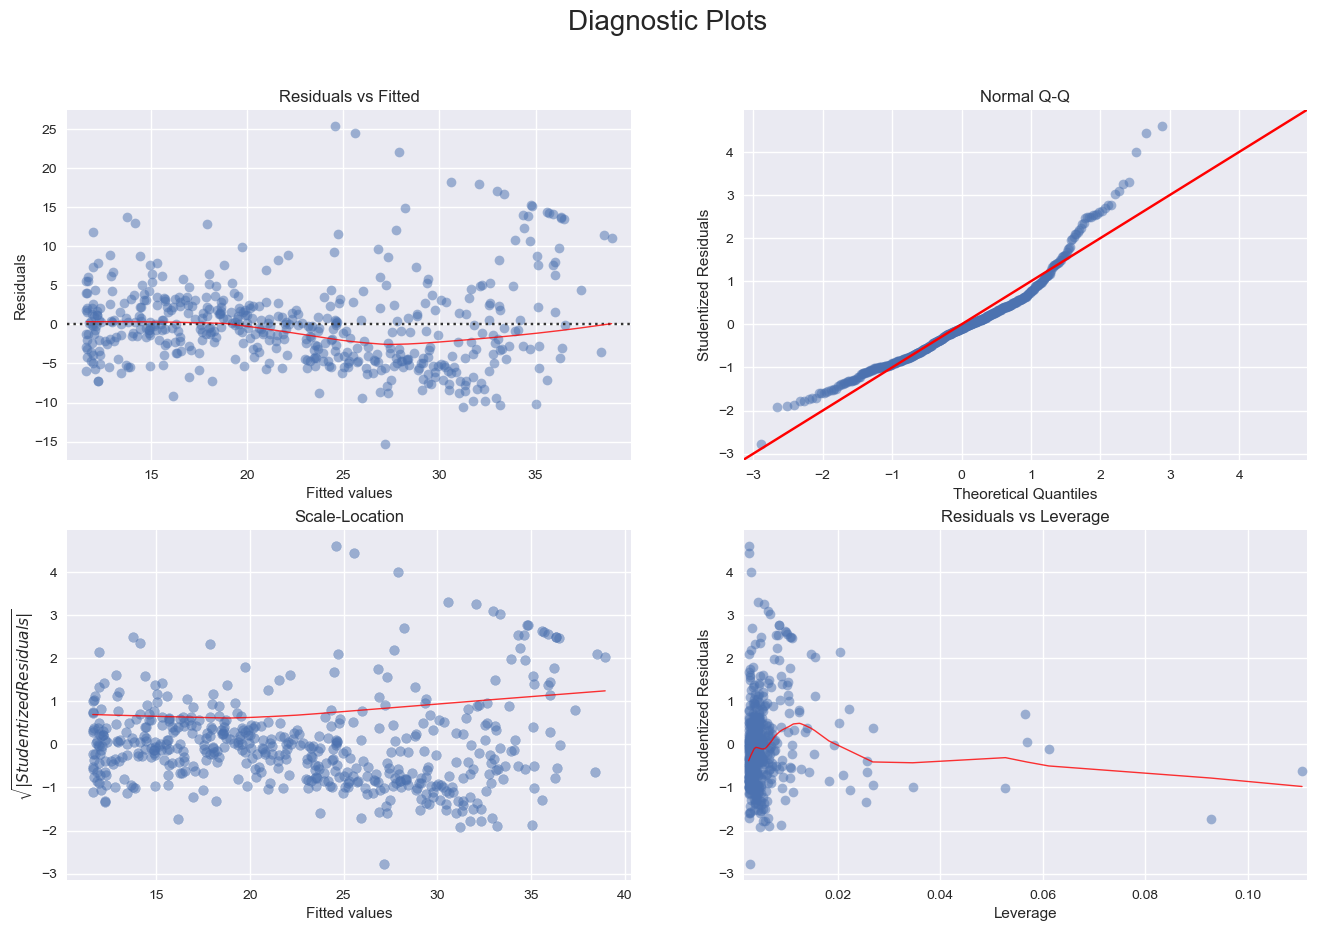

In [32]:
# Make the same diagnostic plots as the first section
fig, ax = plt.subplots(2, 2, figsize = (16, 10))

fitted_values = result2.fittedvalues
residuals = result2.resid
studentized_residuals = result2.get_influence().resid_studentized_internal
leverage = result2.get_influence().hat_matrix_diag

# Residual vs fitted values
sns.residplot(x=fitted_values, y=boston['medv'], lowess = True,
              ax=ax[0, 0], scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax[0, 0].set(xlabel='Fitted values', ylabel='Residuals', 
             title='Residuals vs Fitted')
ax[0, 0].set_xlim(fitted_values.min() - 1, fitted_values.max() + 1)

# Normal Q-Q Plot
smg.qqplot(studentized_residuals, ax=ax[0, 1], alpha=0.5, line='45', lw=1)
ax[0, 1].set(ylabel='Studentized Residuals', title='Normal Q-Q')

# Scale-Location
ax[1, 0].scatter(fitted_values, studentized_residuals, alpha=0.5)
sns.regplot(x=fitted_values, y=np.sqrt(np.abs(studentized_residuals)), 
            ax=ax[1, 0], scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax[1, 0].set(title='Scale-Location', xlabel='Fitted values',
               ylabel='$\sqrt{|Studentized Residuals|}$')

# Residuals vs Leverage
sns.regplot(ax=ax[1, 1], x=leverage, y=studentized_residuals,
            scatter_kws={'alpha': 0.5}, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax[1, 1].set_xlim(leverage.min() - 0.001, leverage.max() + 0.001)
ax[1, 1].set(ylabel='Studentized Residuals', title='Residuals vs Leverage',
             xlabel='Leverage')

plt.suptitle('Diagnostic Plots', size=20)

In [33]:
result5 = smf.ols('medv ~ np.vander(lstat, 6, increasing=True) - 1', data=boston).fit()

In [34]:
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Sat, 01 Oct 2022   Prob (F-statistic):          8.73e-122
Time:                        21:13:40   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
np.vander(lstat, 6, increasing=True)[0]    67.6997      3.604     18.783      0.000      60.618      74.781
np.vander(lstat, 6, increasing=True)[1]   -11.9911      1.526     -7.859      0.000     -14.989      -8.994
np.vander(lstat, 6, increasing=True)[2]     1.2728      0.223      5.703      0.000       0.834       1.711
np.vander(lstat, 6, increasing=True)[3]    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
np.vander(lstat, 6, increasing=True)[4]     0.0017      0.000      4.143      0.000       0.001       0.003
np.vander(lstat, 6, increasing=True)[5] -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
result = smf.ols('medv ~ np.log(rm)', data=boston).fit()

In [36]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           1.22e-64
Time:                        21:13:40   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.000     -86.366     -66.610
np.log(rm)    54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 5. Qualitative Predictors

In [37]:
carseats = sm.datasets.get_rdataset('Carseats', 'ISLR').data

In [38]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [39]:
result = smf.ols('Sales ~ ' + '+'.join(
    carseats.columns[1:]) + '+ Income : Advertising + Price : Age', 
    data=carseats).fit()

In [40]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Sat, 01 Oct 2022   Prob (F-statistic):          6.14e-166
Time:                        21:13:43   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""